**Objective : You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network (Perceptron) to solve this problem.**

Data set:

Input (X): Outside Air Temperature
Output (Y): Overall daily revenue generated in dollars

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import files
file_upload= files.upload()

Saving SalesData (1).csv to SalesData (1) (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('SalesData (1).csv')
df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


<Axes: xlabel='Temperature', ylabel='Revenue'>

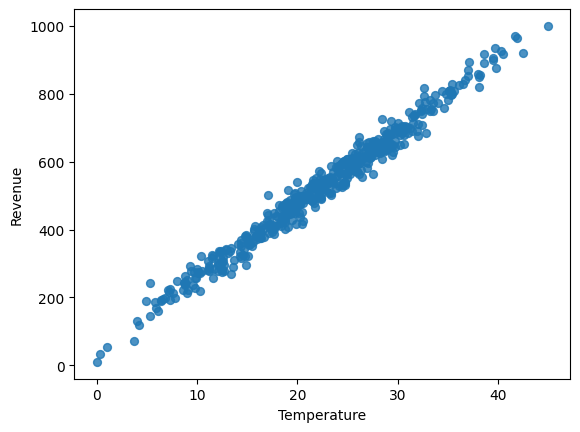

In [ ]:
# @title Temperature vs Revenue

import matplotlib.pyplot as plt
df.plot(kind='scatter', x='Temperature', y='Revenue', s=32, alpha=.8)

<Axes: xlabel='Temperature', ylabel='Revenue'>

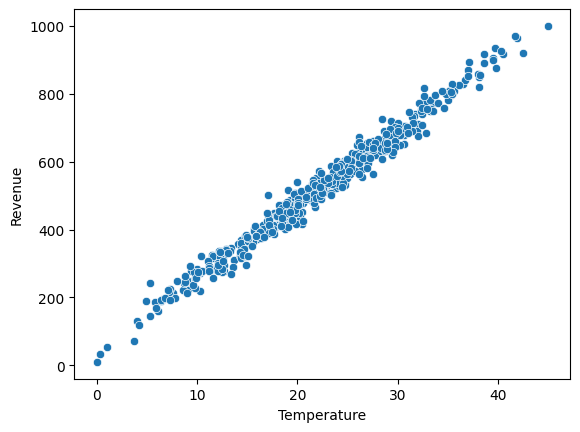

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['Temperature'],y=df['Revenue'])

In [ ]:
X_train=df['Temperature']
y_train=df['Revenue']

In [ ]:
X_train.shape,y_train.shape

((500,), (500,))

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.5),loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 1s 5ms/step - loss: 221198.1562
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 85225.9453
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 21359.2578
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 3351.8486
Epoch 5/1000
16/16 [==============================] - 0s 5ms/step - loss: 738.2365
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 726.4769
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 705.8089
Epoch 8/1000
16/16 [==============================] - 0s 6ms/step - loss: 680.6492
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 679.0131
Epoch 10/1000
16/16 [==============================] - 0s 10ms/step - loss: 678.0206
Epoch 11/1000
16/16 [==============================] - 0s 5ms/step - loss: 677.3727
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 6

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

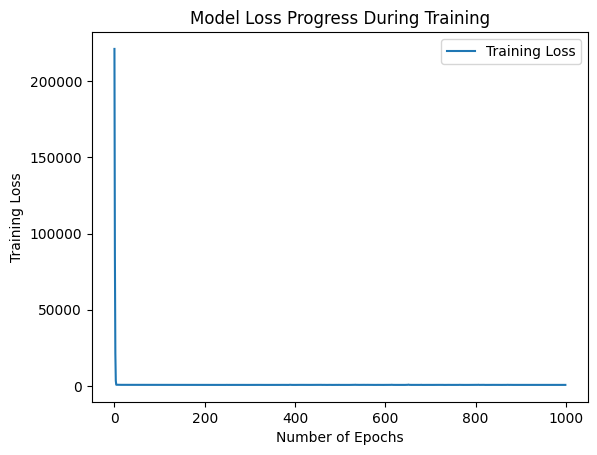

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[21.50733]], dtype=float32), array([44.847515], dtype=float32)]

In [ ]:
temp_c=51
pred_revenue = model.predict([temp_c])

1/1 [==============================] - 0s 167ms/step


In [ ]:
print(f'Revenue Prediction is:{pred_revenue}')

Revenue Prediction is:[[1141.7213]]


16/16 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

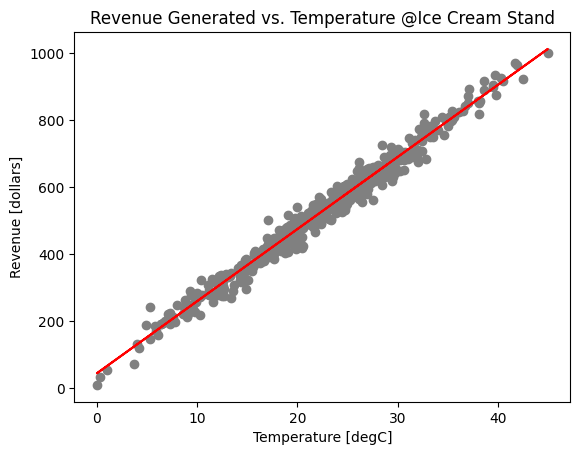

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')